In [1]:
import pickle
import numpy as np
import os
import polars as pl
import matplotlib.pyplot as plt

In [43]:
_pth = r'D:\CMC\pyprojects\radio_therapy\dose-3d\notebooks\matrices'
_files = os.listdir(_pth)

In [47]:
values = {'name':[], 'max':[], 'mean':[]}

_roi_x = 48
_roi_y = 53

# _roi_x = 45
# _roi_y = 56

for _f in _files:
    _file_path = os.path.join(_pth, _f)
    with open(_file_path, 'rb') as f:
        _data = pickle.load(f)
    values['name'].append(_f)
    values['max'].append(np.max(_data[_roi_x:_roi_y, _roi_x:_roi_y, _roi_x:_roi_y]))
    
    #5x5x5 center roi
    _roi_matrix = _data[_roi_x:_roi_y, _roi_x:_roi_y, _roi_x:_roi_y]
    values['mean'].append(np.mean(_roi_matrix))    

In [48]:
df = pl.from_dicts(values)
df.write_csv(r'D:\CMC\pyprojects\radio_therapy\dose-3d\notebooks\EPID_F5x5_P5X5.csv')

Text(0, 0.5, 'pixel values')

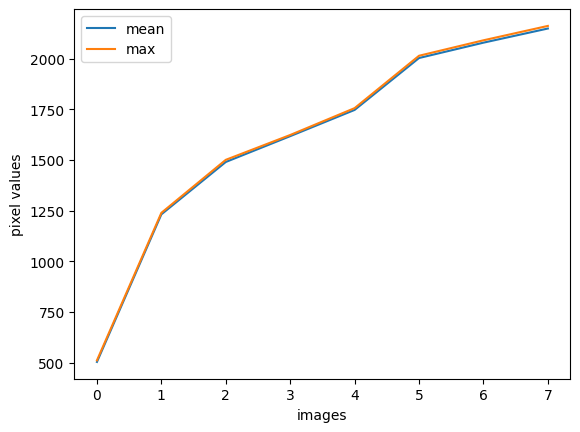

In [49]:
plt.plot(values['mean'], label='mean')
plt.plot(values['max'], label='max')
plt.legend()
plt.xlabel('images')
plt.ylabel('pixel values')